In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv("titanic.csv")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
df_encoded = pd.get_dummies(df, columns=['Sex'])
df_encoded


,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,True,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,True,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,True,False
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,NaN,S,False,True
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,S,True,False
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,1,2,W./C. 6607,23.4500,NaN,S,True,False
889,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C148,C,False,True


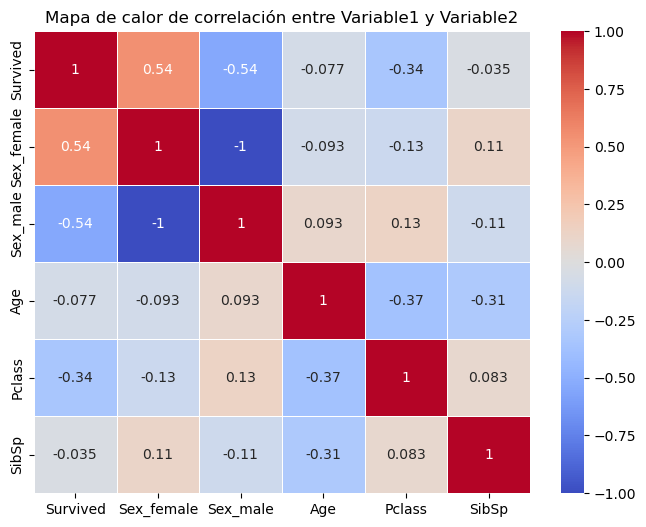

In [4]:
correlation_matrix =df_encoded[['Survived','Sex_female','Sex_male','Age','Pclass','SibSp']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Mapa de calor de correlación entre Variable1 y Variable2')
plt.show()

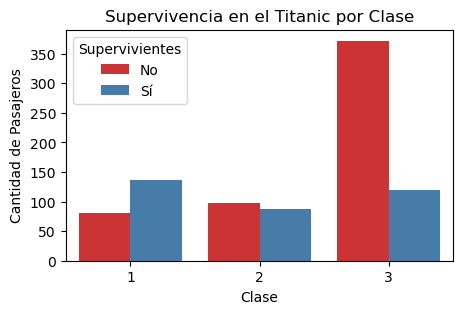

In [8]:
plt.figure(figsize=(5, 3))
sns.countplot(data=df, x='Pclass', hue='Survived', palette='Set1')
plt.title('Supervivencia en el Titanic por Clase')
plt.xlabel('Clase')
plt.ylabel('Cantidad de Pasajeros')
plt.legend(title='Supervivientes', labels=['No', 'Sí'])
plt.show()

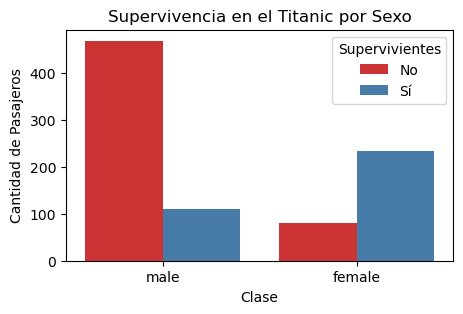

In [6]:
plt.figure(figsize=(5, 3))
sns.countplot(data=df, x='Sex', hue='Survived', palette='Set1')
plt.title('Supervivencia en el Titanic por Sexo')
plt.xlabel('Clase')
plt.ylabel('Cantidad de Pasajeros')
plt.legend(title='Supervivientes', labels=['No', 'Sí'])
plt.show()

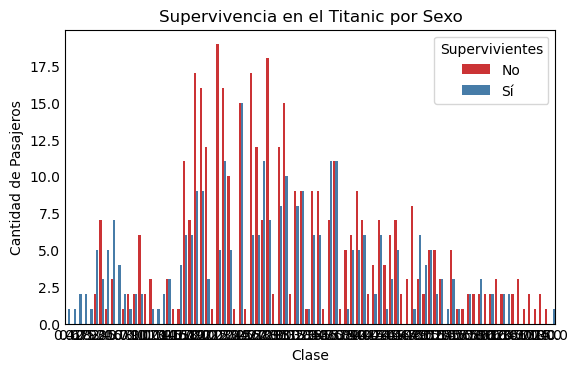

In [23]:
plt.figure(figsize=(5, 3))
sns.countplot(data=df, x='Age', hue='Survived', palette='Set1')
plt.title('Supervivencia en el Titanic por Sexo')
plt.xlabel('Clase')
plt.ylabel('Cantidad de Pasajeros')
plt.legend(title='Supervivientes', labels=['No', 'Sí'])
plt.show()

<Figure size 1000x600 with 0 Axes>

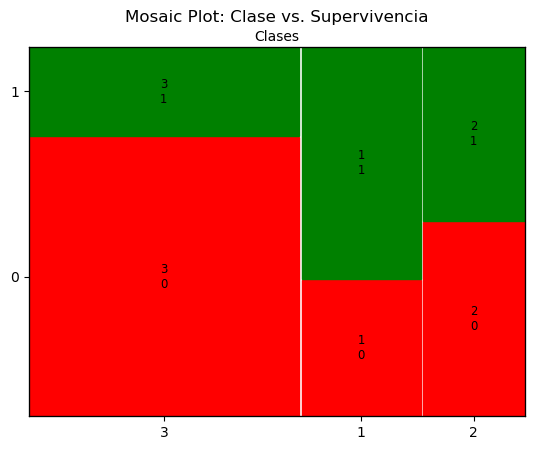

In [7]:
from statsmodels.graphics.mosaicplot import mosaic

# Cargar la base de datos Titanic
titanic_data = pd.read_csv('titanic.csv')
# Esquema de colores
props = lambda key: {'color': 'r' if '0' in key else 'green'}
# Crear un mosaico plot para la relación entre Pclass y Survived
plt.figure(figsize=(10, 6))
mosaic(titanic_data, ['Pclass', 'Survived'], title='Mosaic Plot: Clase vs. Supervivencia', properties=props)
plt.xlabel('Clases')
plt.ylabel('Supervivencia')
plt.show()

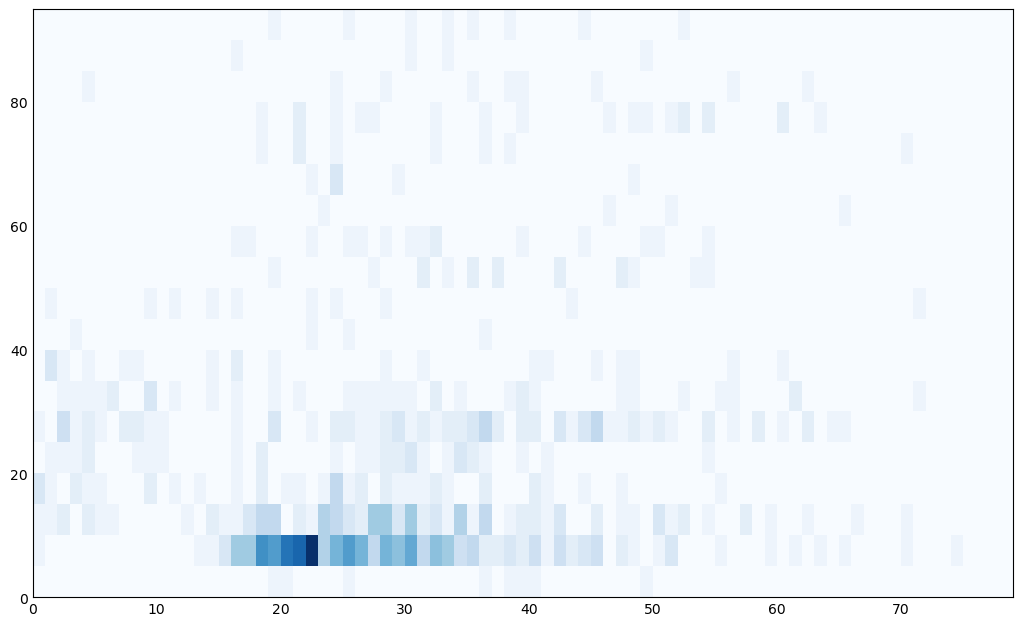

In [22]:
plt.style.use('_mpl-gallery-nogrid')
# make data: correlated + noise
x = df['Age']
y = df['Fare']
# plot:
fig, ax = plt.subplots(figsize=(10, 6))

ax.hist2d(x, y, bins=(np.arange(0, 80, 1), np.arange(0, 100, 5)))


plt.show()

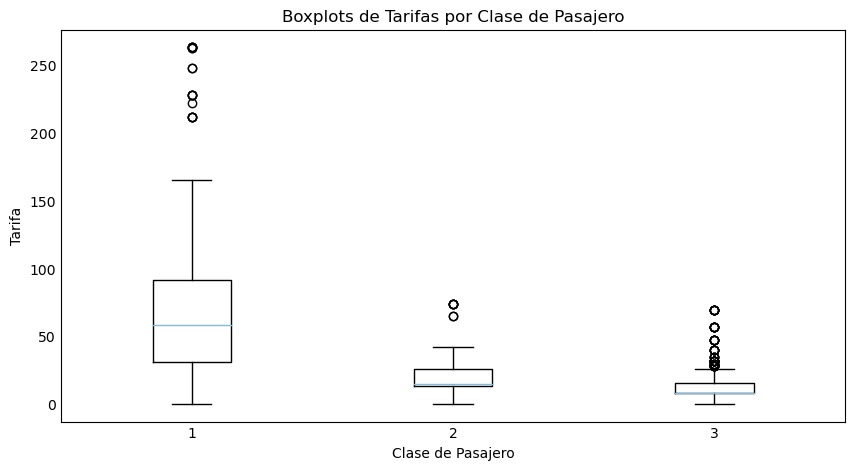

In [25]:
plt.figure(figsize=(8, 4))

# Crea un solo conjunto de ejes compartidos
ax = plt.gca()

# Crear los boxplots en los ejes compartidos
boxplots = []
for pclass in [1,2,3]:
    subset = df[(df['Pclass'] == pclass) & (df['Fare'] <300)]['Fare']
    boxplots.append(subset)

ax.boxplot(boxplots, labels=[1,2,3])
ax.set_xlabel('Clase de Pasajero')
ax.set_ylabel('Tarifa')
ax.set_title('Boxplots de Tarifas por Clase de Pasajero')

# Muestra el boxplot
plt.show()
